In [8]:
from hestonpy.models.heston import Heston
from hestonpy.models.blackScholes import BlackScholes

import matplotlib.pyplot as plt 
import numpy as np

# With syntetic market price

In [9]:
spot = 100
r = 0.0
time_to_maturity = 1
true_params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
vol = np.sqrt(0.04)

heston = Heston(spot=spot, r=r, **true_params)
price_function = heston.call_price

from hestonpy.models.volatilitySmile import VolatilitySmile
strikes = np.linspace(70, 140, 10) 

### Without noise

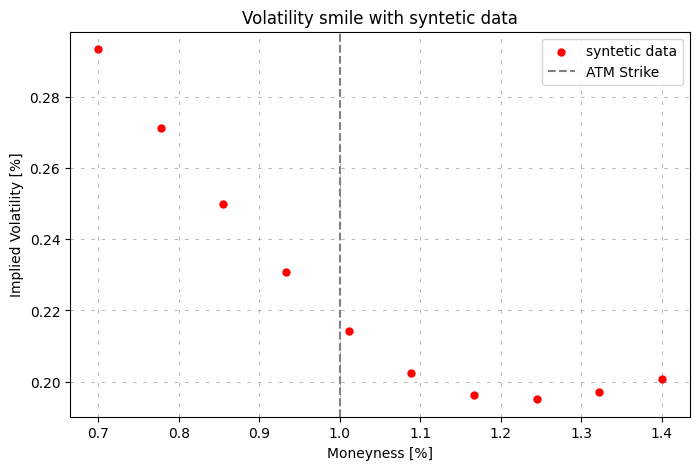

In [10]:
market_prices = np.array([price_function(**true_params, strike=strike, time_to_maturity=time_to_maturity, s=spot) for strike in strikes])

volSmile = VolatilitySmile(
    strikes=strikes,
    maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

Local optimization (might not be global)

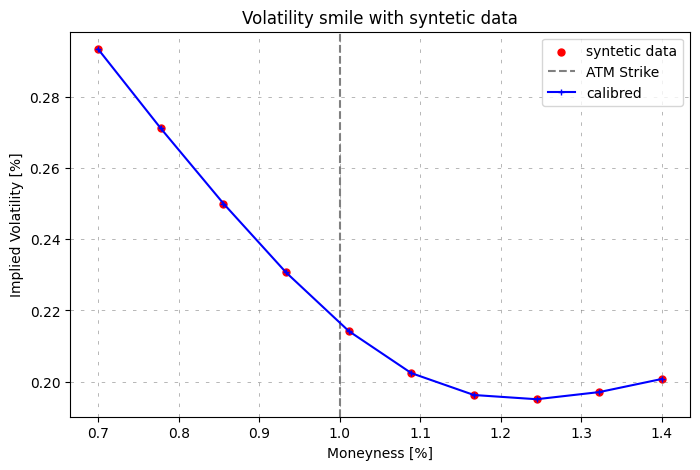

{'vol_initial': np.float64(0.04589326848578038),
 'kappa': np.float64(1.2251416771063923),
 'theta': np.float64(0.07955874138594383),
 'drift_emm': 0,
 'sigma': np.float64(0.6317339943098019),
 'rho': np.float64(-0.5039020008109386)}

In [11]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [12]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

Global optimization

at minimum 0.000008 accepted 1
Parameters: kappa=1.1968650597554673 | theta=0.08004032773272708 | sigma=0.6255899484274712 | rho=-0.50417831188609

at minimum 0.000002 accepted 1
Parameters: kappa=1.113440665340964 | theta=0.08160878602118794 | sigma=0.6075689932993422 | rho=-0.5050195568275148

at minimum 0.000026 accepted 1
Parameters: kappa=1.292658773278528 | theta=0.0784983051354567 | sigma=0.6465029195428652 | rho=-0.5032485024404952

at minimum 0.000014 accepted 1
Parameters: kappa=1.0057752752536508 | theta=0.08403109880257113 | sigma=0.5845213182703969 | rho=-0.5061639748703874



/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:211: RuntimeWarning: invalid value encountered in scalar divide
  gj = lambda u: (rho * sigma * u * 1j - bj - dj(u)) / (


at minimum 4.559501 accepted 0
Parameters: kappa=0.4138037574641472 | theta=0.07739942495379457 | sigma=1.5658004320499537 | rho=-0.8847410112889502

at minimum 0.000035 accepted 1
Parameters: kappa=1.3265697133341052 | theta=0.07800834146797594 | sigma=0.6539669983363154 | rho=-0.5029260012251422

at minimum nan accepted 0
Parameters: kappa=1.083164516979932 | theta=0.16691128083643655 | sigma=0.9496128302776901 | rho=-0.5292995496805141



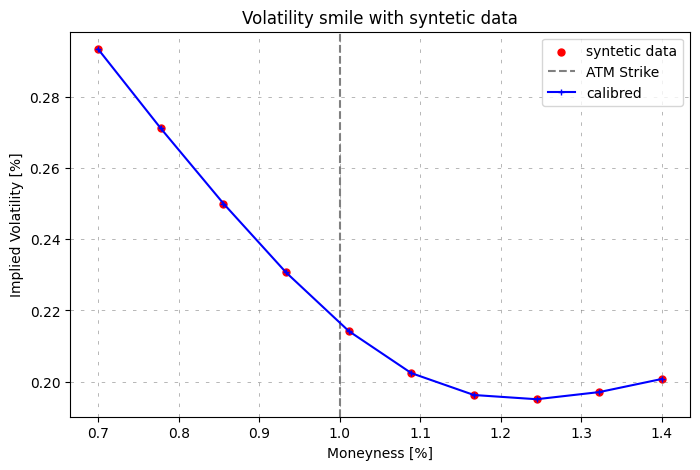

{'vol_initial': np.float64(0.04589326848578038),
 'kappa': np.float64(1.113440665340964),
 'theta': np.float64(0.08160878602118794),
 'drift_emm': 0,
 'sigma': np.float64(0.6075689932993422),
 'rho': np.float64(-0.5050195568275148)}

In [13]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [14]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

with noise

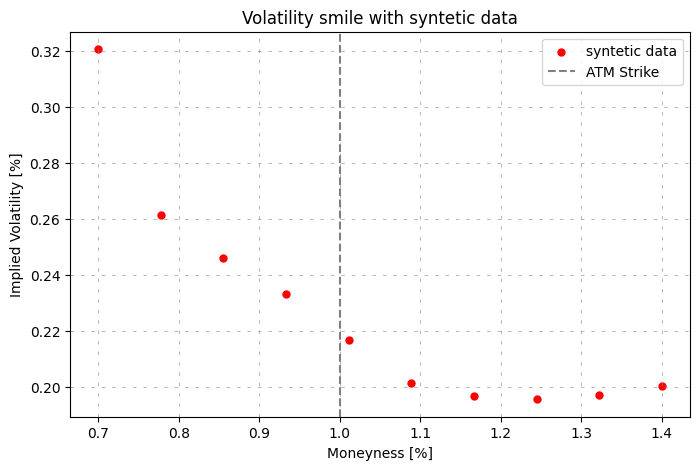

In [15]:
market_prices = market_prices * (1 + np.random.normal(scale=0.01, size=len(market_prices)))  # a little of market noise
volSmile = VolatilitySmile(
    strikes=strikes,
    maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

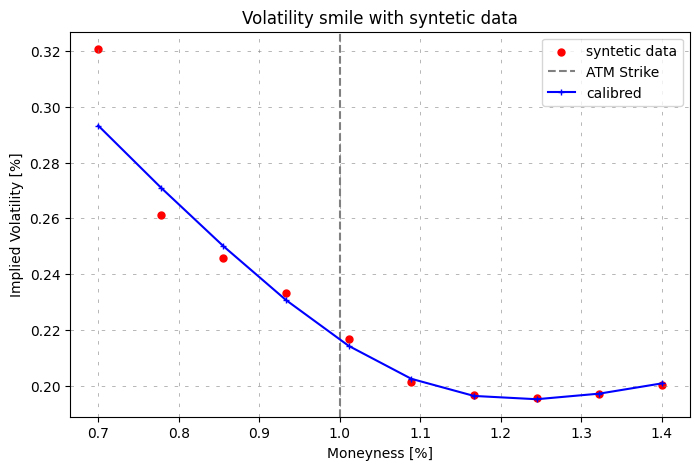

{'vol_initial': np.float64(0.0468926748738082),
 'kappa': np.float64(1.7927480051540852),
 'theta': np.float64(0.07480641415557203),
 'drift_emm': 0,
 'sigma': np.float64(0.8049257104573609),
 'rho': np.float64(-0.5007301278284679)}

In [16]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:217: RuntimeWarning: overflow encountered in scalar multiply
  - 2 * np.log((1 - gj(u) * np.exp(dj(u) * tau)) / (1 - gj(u)))
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:215: RuntimeWarning: invalid value encountered in scalar multiply
  Cj = lambda tau, u: self.r * u * tau * 1j + a * (
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:223: RuntimeWarning: overflow encountered in scalar multiply
  / (1 - gj(u) * np.exp(dj(u) * tau))


at minimum nan accepted 1
Parameters: kappa=1.8201289816371549 | theta=0.07458858678283285 | sigma=0.8112469563738929 | rho=-0.49959254497008804



/home/theo/Documents/packages/hestonpy/src/hestonpy/models/heston.py:220: RuntimeWarning: overflow encountered in scalar divide
  lambda tau, u: (bj - rho * sigma * u * 1j + dj(u))


at minimum nan accepted 1
Parameters: kappa=1.8111210339927308 | theta=0.07474830752030286 | sigma=0.8109294318263454 | rho=-0.49979288763125657

at minimum nan accepted 1
Parameters: kappa=2.054894908512213 | theta=0.35217022205712 | sigma=0.9721753429273337 | rho=-0.4660445531850341

at minimum 5.030886 accepted 1
Parameters: kappa=0.8857408464478478 | theta=0.040994911170151874 | sigma=1.5097258078760327 | rho=-0.770965029951016

at minimum 0.313464 accepted 1
Parameters: kappa=0.013517881277292358 | theta=1.9954571165593242 | sigma=0.4055710238490784 | rho=-0.5210092929523931

at minimum 0.313428 accepted 1
Parameters: kappa=0.014284275728154222 | theta=1.8915882687957197 | sigma=0.4057296599010404 | rho=-0.520994049279526

at minimum 0.313330 accepted 1
Parameters: kappa=0.016412771039239712 | theta=1.6539776241613944 | sigma=0.406164204863068 | rho=-0.5209516934338256

at minimum nan accepted 0
Parameters: kappa=1.671073581283683 | theta=0.0758401197599887 | sigma=0.7744083128953

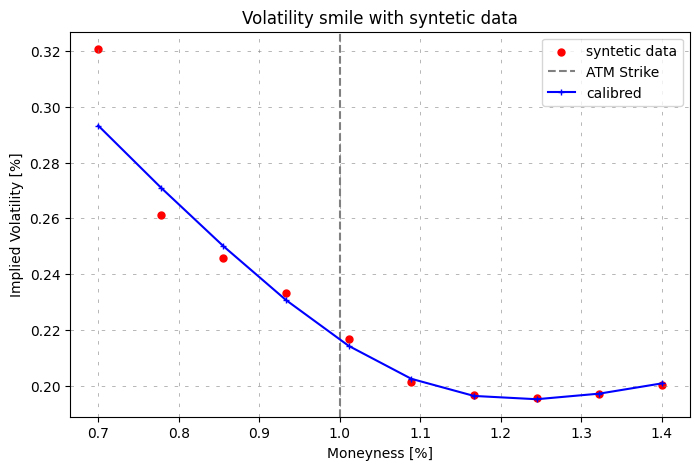

{'vol_initial': np.float64(0.0468926748738082),
 'kappa': np.float64(0.016412771039239712),
 'theta': np.float64(1.6539776241613944),
 'drift_emm': 0,
 'sigma': np.float64(0.406164204863068),
 'rho': np.float64(-0.5209516934338256)}

In [17]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

# Real data

In [ ]:
from hestonpy.option.data import get_options_data

data, spot = get_options_data()
print(spot, data["Expiration Date"].unique())
data.head()

In [ ]:
grouped_dict = {
    maturity.strftime('%Y-%m-%d'): df[['Strike', 'Call Price', 'Volume']].reset_index(drop=True)
    for maturity, df in data.groupby("Expiration Date")
}

market_data = grouped_dict['2025-07-18']
market_data.head()

In [ ]:
marketVolatilitySmile = VolatilitySmile(
    strikes=market_data["Strike"],
    maturity=0.055556,
    atm=spot,
    market_prices=market_data["Call Price"],
    r=r
)
marketVolatilitySmile.plot()